# LP4 Assignment 2
## Sudeep Mangalvedhekar
## 43147

In [26]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

In [27]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  # reshape data
  pixels = x_train.shape[1] * x_train.shape[2]
  x_train = x_train.reshape((x_train.shape[0], pixels))
  x_test = x_test.reshape((x_test.shape[0], pixels)) 
  # one hot encode labels
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return [x_train, y_train, x_test, y_test, pixels]

In [28]:
def normalize(x_train, x_test):
  x_train = x_train.astype('float64')
  x_test = x_test.astype('float64')
  x_train /= 255.0
  x_test /= 255.0
  return [x_train, x_test]

In [29]:
def model_def(pixels):
  model = tf.keras.Sequential([
      tfl.Dense(pixels, activation = 'relu'),
      tfl.Dense(10, activation = 'softmax')
  ])
  optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [30]:
def evaluate_model():
  #load data
  x_train, y_train, x_test, y_test, pixels = load_dataset()
  #normalize data
  x_train, x_test = normalize(x_train, x_test)
  #train model
  model = model_def(pixels)
  batch_size = 128
  epochs = 5
  model_history = model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

  test_loss, test_accuracy = model.evaluate(x_test, y_test)

  return test_loss, test_accuracy, model_history

In [36]:
def plot_performance(model_history):
  training_loss = model_history.history['loss']
  training_accuracy = model_history.history['accuracy']
  epochs = len(training_loss)
  plt.figure(figsize = (8, 8))
  plt.title("Training Loss")
  plt.plot(np.arange(1, epochs + 1), training_loss, color = 'b')
  plt.show()
  plt.figure(figsize = (8, 8))
  plt.title("Training Accuracy")
  plt.plot(np.arange(1, epochs + 1), training_accuracy, color = 'r')
  plt.show()

In [32]:
test_loss, test_accuracy, model_history = evaluate_model()

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.4523 - accuracy: 0.8778
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.2436 - accuracy: 0.9316
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1926 - accuracy: 0.9462
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1611 - accuracy: 0.9546
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1318 - accuracy: 0.9619


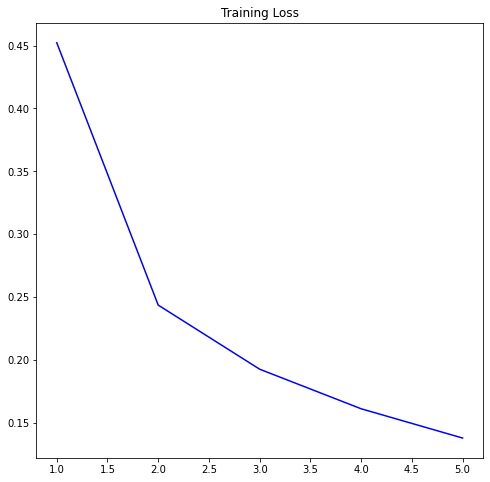

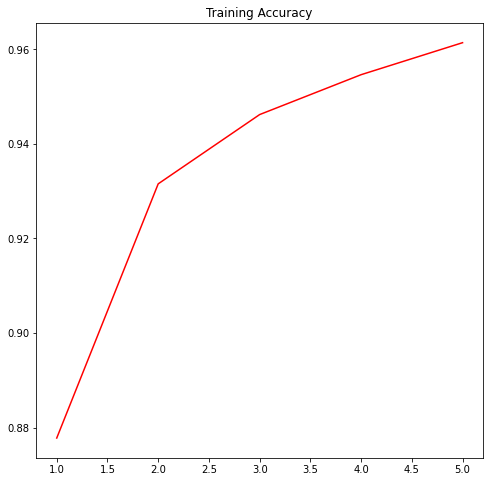

In [37]:
plot_performance(model_history)